In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [62]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                     "parental": "gray"
                    } 
treatments_list = ["W", "I", "K", "parental"]
passages_list = ["p0", "p1", "p2", "p3", "p5", "p10"]
passages_list = [0, 1, 2, 3, 5, 10]

replicates_list = ['a', 'b', 'c', "vs"]
#treatments_list = ["W", "I", "K"]
#passages_list = [ "p1", "p2", "p3", "p5", "p10"]
#replicates_list = ['a', 'b', 'c']

In [63]:
fname = "../../results_summary/all_mutations.annotated.filtered.csv"
df = pd.read_csv(fname)

In [64]:
df['genotype'] = df['file'].str.split("/").str[2].str.split("_").str[0]
df['rep'] = df['file'].str.split("/").str[2].str.split("_").str[2]
df['passage'] = df['file'].str.split("/").str[2].str.split("_").str[1]
df['n_var'] = df['Rvar'] + df['Fvar']
df['n_tot'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_var'] / df['n_tot']
df['position'] = df['POS'] 
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT']

df['passage'] = df['passage'].str.split("p").str[-1].astype(int)

In [65]:
df['rep'].unique()

array(['vs', 'a', 'b', 'c'], dtype=object)

In [66]:
freq_thres = 0.0

In [67]:
df[df['virus']=='crpv']['frequency'].median()

0.0007282889041453368

In [68]:
def number_of_polymorphisms(df_mutations, minor_allele_frequency=0):
    df_temp = df_mutations[df_mutations["frequency"] > minor_allele_frequency]
    variant_positions = df_temp["position"].unique()
    return len(variant_positions)

df_diversity = pd.DataFrame()

for v in df['virus'].unique():
    for t in treatments_list:
        for p in passages_list:
            for r in replicates_list:

                df_temp = df[(df['genotype']== t)]
                df_temp = df_temp[df_temp['passage']==p]
                df_temp = df_temp[df_temp['rep']==r]
                df_temp = df_temp[df_temp['virus']==v]
                if df_temp.shape[0]>0:

                    dict_t = {'genotype': t, 
                              'virus': v, 
                              'passage': p, 
                              'rep': r,
                              'n_polymorphisms': [number_of_polymorphisms(df_temp, freq_thres)]}
                    df_diversity = pd.concat([df_diversity, pd.DataFrame(data=dict_t)])
                else:
                    print(t,"passage ", p, r)
df_diversity = df_diversity.reset_index()

W passage  0 a
W passage  0 b
W passage  0 c
W passage  0 vs
W passage  1 vs
W passage  2 vs
W passage  3 vs
W passage  5 vs
W passage  10 vs
I passage  0 a
I passage  0 b
I passage  0 c
I passage  0 vs
I passage  1 vs
I passage  2 vs
I passage  3 vs
I passage  5 vs
I passage  10 vs
K passage  0 a
K passage  0 b
K passage  0 c
K passage  0 vs
K passage  1 vs
K passage  2 vs
K passage  3 vs
K passage  5 vs
K passage  10 vs
parental passage  0 a
parental passage  0 b
parental passage  0 c
parental passage  1 a
parental passage  1 b
parental passage  1 c
parental passage  1 vs
parental passage  2 a
parental passage  2 b
parental passage  2 c
parental passage  2 vs
parental passage  3 a
parental passage  3 b
parental passage  3 c
parental passage  3 vs
parental passage  5 a
parental passage  5 b
parental passage  5 c
parental passage  5 vs
parental passage  10 a
parental passage  10 b
parental passage  10 c
parental passage  10 vs
W passage  0 a
W passage  0 b
W passage  0 c
W passage  0 v

In [69]:
dcv_parental = df_diversity[(df_diversity['virus']=='dcv') &(df_diversity['genotype']=='parental')]['n_polymorphisms'].values[0]
crpv_parental = df_diversity[(df_diversity['virus']=='crpv') &(df_diversity['genotype']=='parental')]['n_polymorphisms'].values[0]

In [70]:
crpv_parental

244

In [71]:
df_diversity[(df_diversity['genotype']=='I') 
             & (df_diversity['virus']=='crpv')
             & (df_diversity['passage']=='p1')]['n_polymorphisms'].mean()

nan

In [72]:
df_diversity[(df_diversity['genotype']=='I') 
             & (df_diversity['virus']=='crpv')
             & (df_diversity['passage']=='p10')]['n_polymorphisms'].mean()

nan

In [73]:
df_diversity[(df_diversity['genotype']=='K') 
             & (df_diversity['virus']=='crpv')
             & (df_diversity['passage']=='p')]['n_polymorphisms'].mean()

nan

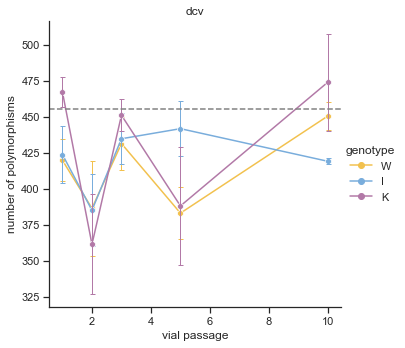

In [77]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')
sns.set_style("ticks")  # or try "whitegrid"


g = sns.relplot(data=df_diversity,
                kind='line',
                  x="passage", 
                  y='n_polymorphisms', 
                  col="virus", 
                  hue ='genotype',
                  hue_order=['W', 'I', 'K'], 
                  errorbar="se",
                  #order=["p1", "p2", "p3", "p5", "p10"],
                  palette=our_color_palette, 
                col_order=['dcv'],
                marker='o', 
                err_style="bars",
                err_kws={"elinewidth": 1., "capsize": 2.5},
                )
#g.ax.set_ylim(0,9.5)
g.set_axis_labels("vial passage", "number of polymorphisms")
g.set_titles(col_template="{col_name}")



# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'crpv':  # Add line to subplots where virus is A
        ax.axhline(y=crpv_parental, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'dcv':  # Add line to subplots where virus is A
        ax.axhline(y=dcv_parental, color='gray', linestyle='--')  # Add vertical line at passage 3

plt.show()

g.figure.savefig(f"/Users/lfuhrmann/Downloads/dcv_number_polymorphisms_freq0.00.pdf")

## non-syn 

In [37]:
fname = "../../results_summary/all_mutations.annotated.filtered.csv"
df = pd.read_csv(fname)

df['genotype'] = df['file'].str.split("/").str[2].str.split("_").str[0]
df['rep'] = df['file'].str.split("/").str[2].str.split("_").str[2]
df['passage'] = df['file'].str.split("/").str[2].str.split("_").str[1]
df['n_var'] = df['Rvar'] + df['Fvar']
df['n_tot'] = df['Rtot'] + df['Ftot']
df['frequency'] = df['n_var'] / df['n_tot']
df['position'] = df['POS'] 
df['mutation'] = df['REF'] + df['POS'].astype(str) + df['ALT']


df = df[df['IsSynonymous']==1]
#df = df[df['virus']=='crpv']

In [38]:
freq_thres = 0.01

In [39]:
def number_of_polymorphisms(df_mutations, minor_allele_frequency=0):
    df_temp = df_mutations[df_mutations["frequency"] > minor_allele_frequency]
    variant_positions = df_temp["position"].unique()
    return len(variant_positions)

df_diversity = pd.DataFrame()

for v in df['virus'].unique():
    for t in treatments_list:
        for p in passages_list:
            for r in replicates_list:

                df_temp = df[(df['genotype']== t)]
                df_temp = df_temp[df_temp['passage']==p]
                df_temp = df_temp[df_temp['rep']==r]
                df_temp = df_temp[df_temp['virus']==v]
                if df_temp.shape[0]>0:

                    dict_t = {'genotype': t, 
                              'virus': v, 
                              'passage': p, 
                              'rep': r,
                              'n_polymorphisms': [number_of_polymorphisms(df_temp, freq_thres)]}
                    df_diversity = pd.concat([df_diversity, pd.DataFrame(data=dict_t)])
                else:
                    print(t,"passage ", p, r)
df_diversity = df_diversity.reset_index()

W passage  p0 a
W passage  p0 b
W passage  p0 c
W passage  p0 vs
W passage  p1 vs
W passage  p2 vs
W passage  p3 vs
W passage  p5 vs
W passage  p10 vs
I passage  p0 a
I passage  p0 b
I passage  p0 c
I passage  p0 vs
I passage  p1 vs
I passage  p2 vs
I passage  p3 vs
I passage  p5 vs
I passage  p10 vs
K passage  p0 a
K passage  p0 b
K passage  p0 c
K passage  p0 vs
K passage  p1 vs
K passage  p2 vs
K passage  p3 vs
K passage  p5 vs
K passage  p10 vs
parental passage  p0 a
parental passage  p0 b
parental passage  p0 c
parental passage  p1 a
parental passage  p1 b
parental passage  p1 c
parental passage  p1 vs
parental passage  p2 a
parental passage  p2 b
parental passage  p2 c
parental passage  p2 vs
parental passage  p3 a
parental passage  p3 b
parental passage  p3 c
parental passage  p3 vs
parental passage  p5 a
parental passage  p5 b
parental passage  p5 c
parental passage  p5 vs
parental passage  p10 a
parental passage  p10 b
parental passage  p10 c
parental passage  p10 vs
W passage

In [40]:
crpv_parental = df_diversity[(df_diversity['virus']=='crpv') &(df_diversity['genotype']=='parental')]['n_polymorphisms'].values[0]

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_2919/778585239.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(data=df_diversity,


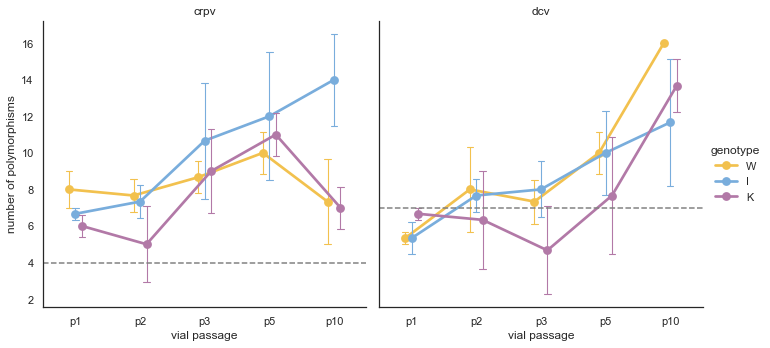

In [41]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')
from matplotlib.ticker import MultipleLocator


g = sns.catplot(data=df_diversity,
                kind='point',
                  x="passage", 
                  y='n_polymorphisms', 
                  col="virus", 
                  hue ='genotype',
                  hue_order=['W', 'I', 'K'], 
                  errorbar="se",
                  order=["p1", "p2", "p3", "p5", "p10"],
                  palette=our_color_palette, 
                col_order=['crpv'],
                  errwidth=1.1, 
                  dodge=0.2,
                  capsize=0.1)
#g.ax.set_ylim(0,9.5)
g.set_axis_labels("vial passage", "number of polymorphisms")
g.set_titles(col_template="{col_name}")


# Access the axes and explicitly set minor ticks
for ax in g.axes.flat:
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))  # Adjust 0.1 to your desired interval
    ax.tick_params(axis='y', which='minor', length=4, color='black')

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'crpv':  # Add line to subplots where virus is A
        ax.axhline(y=crpv_parental, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'dcv':  # Add line to subplots where virus is A
        ax.axhline(y=dcv_parental, color='gray', linestyle='--')  # Add vertical line at passage 3


g.figure.savefig(f"/Users/lfuhrmann/Downloads/number_NSpolymorphisms_freq0.00.pdf")

In [16]:
df_diversity[(df_diversity['genotype']=='I') 
             & (df_diversity['virus']=='crpv')
             & (df_diversity['passage']=='p1')]['n_polymorphisms'].mean()

70.33333333333333

In [17]:
df_diversity[(df_diversity['genotype']=='I') 
             & (df_diversity['virus']=='crpv')
             & (df_diversity['passage']=='p10')]['n_polymorphisms'].mean()

109.33333333333333

In [18]:
df_diversity[(df_diversity['genotype']=='K') 
             & (df_diversity['virus']=='crpv')
             & (df_diversity['passage']=='p')]['n_polymorphisms'].mean()

nan

In [19]:
crpv_parental

93